<h1 style="text-align:center;vertical-align:middle">数据挖掘第四周作业</h1>
<h1 style="text-align:center;vertical-align:middle">选用数据集GitHub Dataset</h1>
<h3 style="text-align:center;vertical-align:middle">1120193285  张秋雨 计算机学院计算机科学与技术专业07111908班</h3>

## 数据概览


In [1]:
import pandas as pd
import numpy as np
import github_dataset

In [2]:
github_dataset.show_col()

Index(['repositories', 'stars_count', 'forks_count', 'issues_count',
       'pull_requests', 'contributors', 'language'],
      dtype='object')

每行数据包括7个列，分别代表：

- **repositories** 数据仓库。
- **stars_count** 星星数量
- **forks_count** fork的数量
- **issues_count** 事件的计数
- **pull_requests** 提交请求的数量
- **contributors** 贡献者数量
- **language** 使用的语言

接下来的内容将对以上属性中的数值属性，有意义的非唯一标称属性，以及可推导获得的有意义的属性进行数据分析与预处理。

### 1 repositories (无缺失值)

In [3]:
helper = github_dataset.col_helper()

In [4]:
helper.select_col('repositories')
# 缺失值个数
n_b = helper.count_none()

0


没有缺失值

### 2 stars_count (无缺失值)


In [5]:
helper.select_col('stars_count')

In [6]:
helper.count_none('')

0


0

没有缺失值

**数据摘要**

In [7]:
# 五数概括
helper.five_number()

Min: 0
Q1: 1.0
Q2: 12.0
Q3: 65.25
Max: 995


**数据分布**

[  0 271   0 ...   0  11   4]


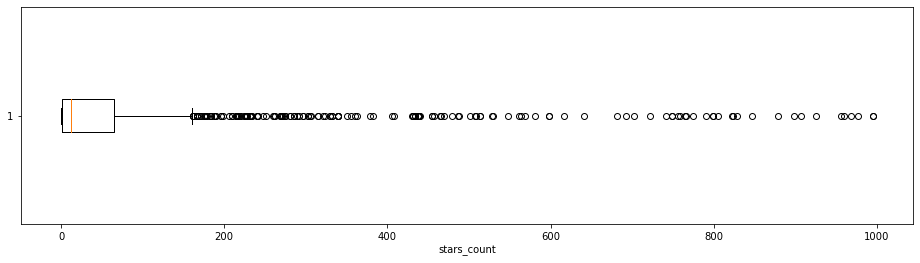

161.625


In [8]:
# 盒图
helper.box(16,4,'stars_count')

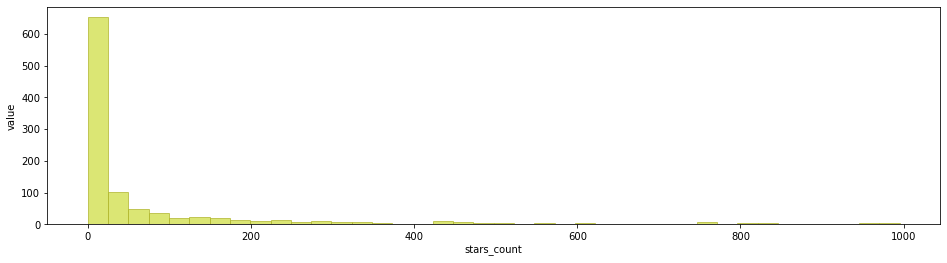

In [9]:
# 直方图
helper.normal_hist(16,4,'stars_count','value')

从盒图和直方图可以看出，大多数的仓库都没有星星数量

### 3 forks_count (无缺失值)



In [10]:
helper.select_col('forks_count')

In [11]:
helper.count_none('')

0


0

没有缺失值

**数据摘要**

In [12]:
# 五数概括
helper.five_number()

Min: 0
Q1: 1.0
Q2: 6.0
Q3: 38.25
Max: 973


**数据分布**

[  0 150   0 ...   5   5   3]


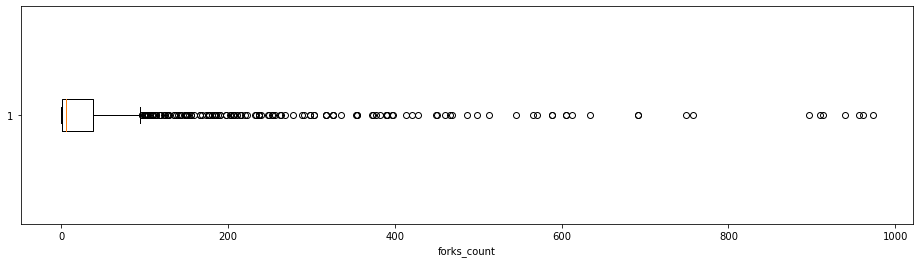

94.125


In [13]:
# 盒图
helper.box(16,4,'forks_count')

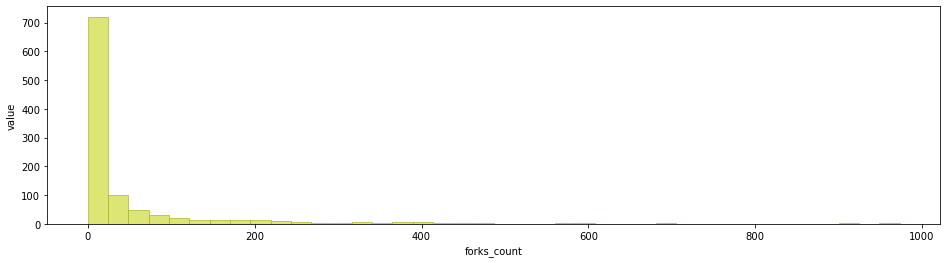

In [14]:
# 直方图
helper.normal_hist(16,4,'forks_count','value')

从盒图和直方图可以看出，大多数的仓库都没有fork数量

### 4 issues_count(无缺失值)

In [15]:
helper.select_col('issues_count')

In [16]:
helper.count_none() #无缺失值

0


0

没有缺失值

**数据摘要**

In [17]:
# 五数概括
helper.five_number()

Min: 1
Q1: 1.0
Q2: 2.0
Q3: 6.0
Max: 612


**数据分布**

[612 536 313 ...   1   1   1]


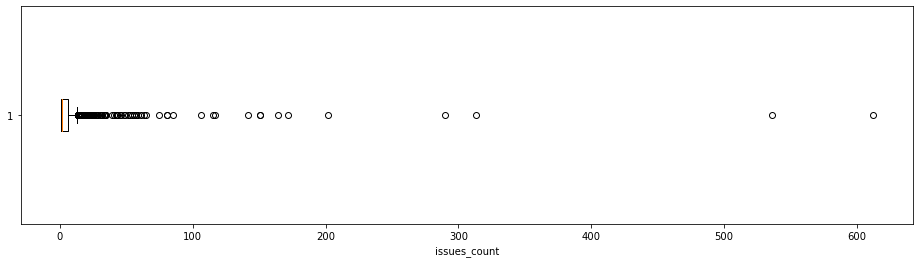

13.5


In [18]:
# 盒图
helper.box(16,4,'issues_count')

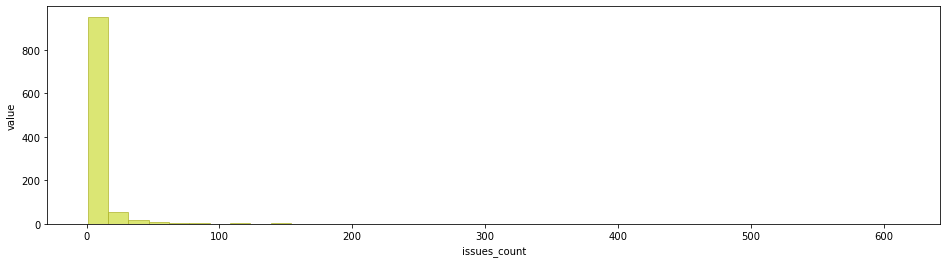

In [19]:
# 直方图
helper.normal_hist(16,4,'issues_count','value')

从盒图和直方图可以看出，大多数的仓库的issue数量均为1.

### 5 pull_requests(无缺失值)


In [20]:
helper.select_col('pull_requests')

In [21]:
helper.count_none()

0


0

无缺失值
  

**数据摘要**
  

In [22]:
# 五数概括
helper.five_number()

Min: 0
Q1: 0.0
Q2: 0.0
Q3: 2.0
Max: 567


**数据分布**
  

[316   6  27 ...   1   0   0]


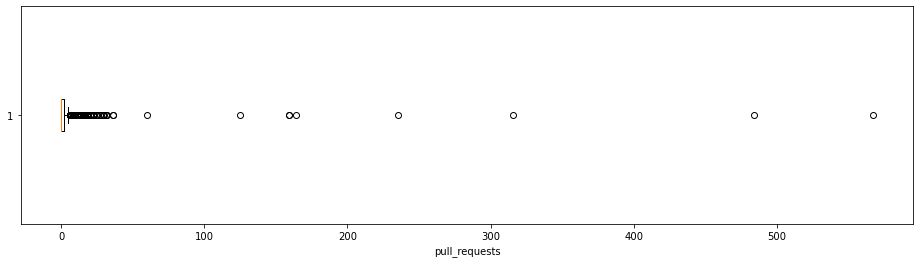

5.0


In [23]:
# 盒图
helper.box(16,4,'pull_requests')

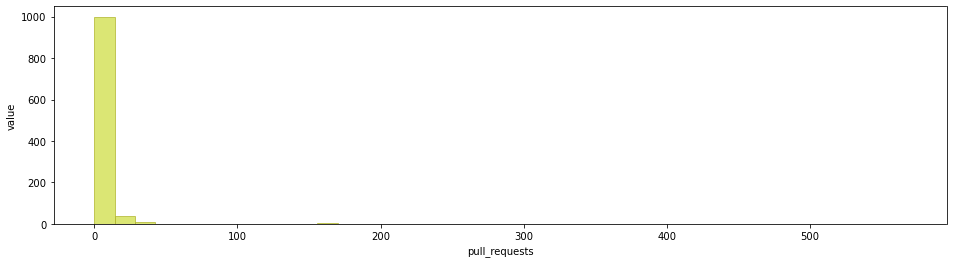

In [24]:
# 直方图
helper.normal_hist(16,4,'pull_requests','value')

从盒图和直方图可以看出，几乎所有的仓库的pull_requests数量均小于100.

### 6 contributors(无缺失值)


In [25]:
helper.select_col('contributors')

In [26]:
helper.count_none()

0


0

无缺失值
  

**数据摘要**
  

In [27]:
# 五数概括
helper.five_number()

Min: 0
Q1: 0.0
Q2: 2.0
Q3: 4.0
Max: 658


**数据分布**
  

[  2  71 154 ...   7   0   0]


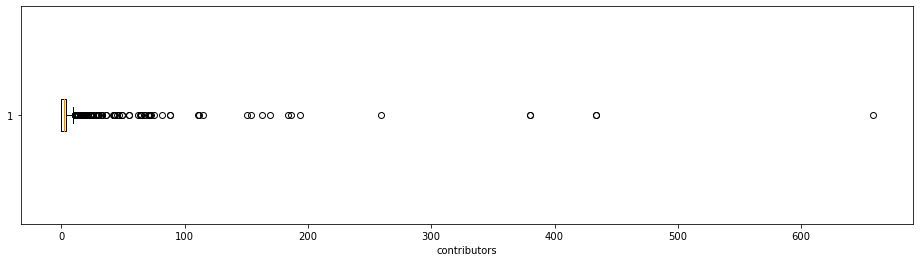

10.0


In [28]:
# 盒图
helper.box(16,4,'contributors')

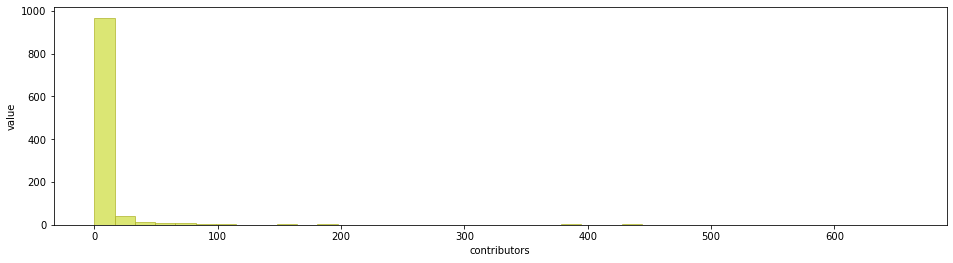

In [29]:
# 直方图
helper.normal_hist(16,4,'contributors','value')

从盒图和直方图可以看出，几乎所有的仓库的contributors数量均小于100.

### 7 使用的语言(有缺失值)


In [30]:
helper.select_col('language')

In [31]:
helper.count_none()

145


145

**有145个仓库对应的语言是NULL**
  

**数据分布**
  

In [32]:
helper.data['language'].value_counts()

JavaScript          253
Python              155
NULL                145
HTML                 72
Java                 44
CSS                  37
TypeScript           37
Dart                 36
Jupyter Notebook     29
C++                  29
Ruby                 28
C                    26
Shell                25
PHP                  16
Go                   15
Swift                10
Rust                 10
C#                    8
Objective-C           8
Kotlin                7
Makefile              6
Jinja                 5
SCSS                  4
AutoHotkey            3
Dockerfile            3
CoffeeScript          3
Perl                  3
Solidity              3
Vim Script            2
Pawn                  2
Assembly              2
PowerShell            2
Hack                  2
CodeQL                2
Vue                   2
Elixir                2
Gherkin               1
QMake                 1
CMake                 1
Oz                    1
Cuda                  1
QML             

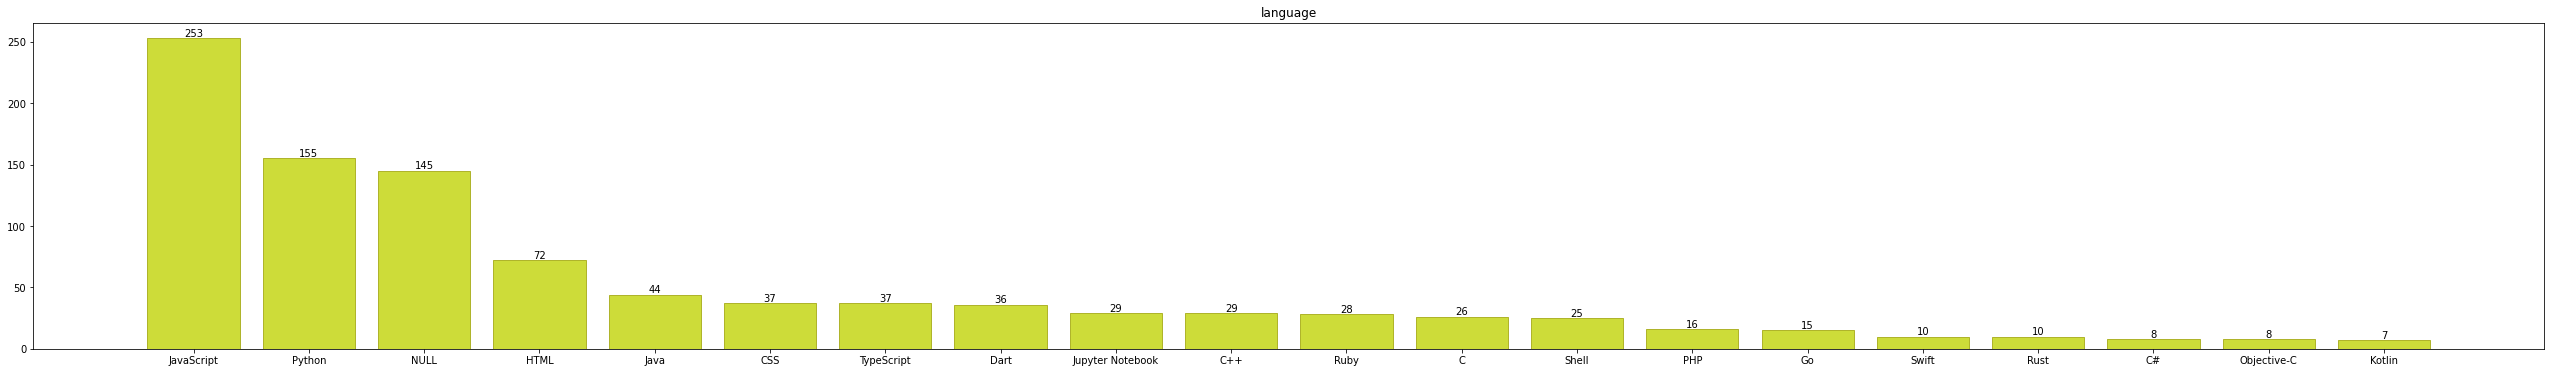

In [33]:
helper.hist_bar(45,6,20)

部分仓库的语言数据存在缺失值，推测原因是在数据记录时出错，因为一个代码仓库不能没有使用的语言，因此可以推测是数据收集以及整理过程中就已经出现了问题。这里可以进行缺失值的处理方式有以下几种：

删除所有缺失数据： 因为缺失值个数和不是很多，直接删除应该影响并不能对后续的数据分析造成不可逆的影响。

将缺失数据用频率最高的值代替：  JavaScript，可用该语言进行填充。

利用数据对象的相关性进行填补

利用属性的相关性进行填补

此处由于仓库的各种数据指标无法与所使用的的语言进行关联，所以这里使用直接删除的方式。

In [34]:
index11,row11 = github_dataset.get_row_index('language','NULL')
print(row11)

[array(['octocat/Hello-World', 0, 0, 612, 316, 2, 'NULL'], dtype=object), array(['EddieHubCommunity/support', 271, 150, 536, 6, 71, 'NULL'],
      dtype=object), array(['taniarascia/comments', 4, 0, 117, 0, 0, 'NULL'], dtype=object), array(['florinpop17/app-ideas', 0, 0, 46, 235, 68, 'NULL'], dtype=object), array(['education/teachers', 176, 28, 39, 0, 2, 'NULL'], dtype=object), array(['octocat/hello-worId', 176, 114, 35, 9, 0, 'NULL'], dtype=object), array(['anuraghazra/anuraghazra', 228, 0, 33, 4, 3, 'NULL'], dtype=object), array(['WhiteHouse/api-standards', 0, 910, 27, 7, 12, 'NULL'],
      dtype=object), array(['offensive-security/kali-nethunter', 0, 897, 26, 3, 33, 'NULL'],
      dtype=object), array(['octocat/git-consortium', 135, 67, 25, 10, 0, 'NULL'], dtype=object), array(['benawad/astral-bugs', 42, 1, 18, 0, 0, 'NULL'], dtype=object), array(['openfoodfacts/offf', 0, 0, 16, 0, 0, 'NULL'], dtype=object), array(['offensive-security/nethunter-app', 281, 159, 16, 2, 22, 'NULL'],
  

In [35]:
github_dataset.delete_row(index11)

In [36]:
# 删除后缺失值个数
helper.count_none_after()

0


0

In [37]:
helper.data2['language'].value_counts()

JavaScript          253
Python              155
HTML                 72
Java                 44
CSS                  37
TypeScript           37
Dart                 36
C++                  29
Jupyter Notebook     29
Ruby                 28
C                    26
Shell                25
PHP                  16
Go                   15
Rust                 10
Swift                10
C#                    8
Objective-C           8
Kotlin                7
Makefile              6
Jinja                 5
SCSS                  4
CoffeeScript          3
Perl                  3
Dockerfile            3
Solidity              3
AutoHotkey            3
Hack                  2
Pawn                  2
CodeQL                2
PowerShell            2
Assembly              2
Vim Script            2
Vue                   2
Elixir                2
Gherkin               1
QMake                 1
CMake                 1
Oz                    1
Cuda                  1
QML                   1
ActionScript    